In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

/Users/albarron/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
url = "../Data/myopia.csv"
MyopiaData = pd.read_csv(url)

In [3]:
MyopiaData.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


Here is our dataset dictionary: https://www.umass.edu/statdata/statdata/data/myopia.pdf

#### We are interested in finding out what contributes to Myopia the most. My grandmother always told me not to watch TV, play with computer since it will affect my eyes. (She was strangely find with studying!). It sounds like Drs share the same point of view with my grandmother " http://www.allaboutvision.com/conditions/myopia.htm "

#### We are DataScientist and don't trust our grandmothers or DRs unless we find the same result! Now, let's go and explore Myopia!




In [4]:
# Year of study and id should not affect anything so we disregard them in this study. 
# we consider two types of inputs - first all general inputs - i.e. physical and external inputs
# second only external inputs
X1 = MyopiaData[['SPHEQ','AL','ACD','LT','VCD','AGE','GENDER','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']]
X2 = MyopiaData[['AGE','GENDER','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']]
y = MyopiaData['MYOPIC']


Run your regression line on X1 and interpret your MOMMY AND DADMY coefficients.

In [5]:
lm = LogisticRegression()
lm.fit(X1,y)
zip(X1.columns.values,lm.coef_[0])

[('SPHEQ', -3.3942542772780695),
 ('AL', 0.11608516047891518),
 ('ACD', 0.77257073188341086),
 ('LT', -0.31202055911991705),
 ('VCD', -0.32603757375194709),
 ('AGE', 0.0037907162023450144),
 ('GENDER', 0.53625097087394702),
 ('SPORTHR', -0.047395912003296611),
 ('READHR', 0.097642190656728661),
 ('COMPHR', 0.050158814805345044),
 ('STUDYHR', -0.13224774323757602),
 ('TVHR', -0.0043864259312676873),
 ('DIOPTERHR', -0.0078854540607219206),
 ('MOMMY', 0.63899601207466961),
 ('DADMY', 0.72678876617140575)]

Interpretation: 

ACD, Gender, parents (Mommy and Dadmy) are strongly correlated.

LT, Spheq, and VCD are negatively associated

#### Use confusion matrix and estimate False negative rate and False positive rate

In [6]:
y_hat = lm.predict(X1)
cmat = confusion_matrix(y_hat,y)
cmat

array([[524,  53],
       [ 13,  28]])

In [7]:
# This is actually reversed
TP = cmat[0][0]
FP = cmat[0][1] 
FN = cmat[1][0]
TN = cmat[1][1]

In [8]:
print 'FNR:',FN/(TP+FN*1.0)
print 'FPR:',FP/(TN+FP*1.0)

FNR: 0.024208566108
FPR: 0.654320987654


#### Use 10-fold cross-validation to measure accuracy of your predictions

In [9]:
print "cross validication score", cross_val_score(lm,X1,y,cv=10).mean()
print "Misclassificaiton error", 1-cross_val_score(lm,X1,y,cv=10).mean()

cross validication score 0.886747164933
Misclassificaiton error 0.113252835067


#### In your dataset, what percentage of cases are myopic?

In [10]:
print "% Actual myopic",len(MyopiaData[MyopiaData['MYOPIC']==1])/float(len(MyopiaData))

% Actual myopic 0.131067961165


In [11]:
# print "Accuracy",float(sum(y_hat))/sum(y) 
# This doesn't work because the negatives aren't interacting.

#### Based on the result you found above, is your prediction precision good or bad?

Answer: It's terrible, because our misclassification error is almost the actual population that experiences myopia (so it could be error itself, almost)

#### Imagine you would like to decrease your False negative rate. What can you do in order to make it less than 2%? 

Auc score: 0.895923856818


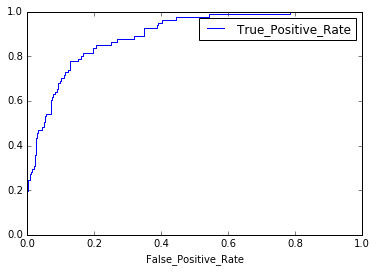

In [12]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_hat_probability = lm.predict_proba(X1).T[1]
# print(y_hat_probability)
print "Auc score:",roc_auc_score(y, y_hat_probability)
vals = roc_curve(y, y_hat_probability)
Roc_DataFrame = pd.DataFrame({'False_Positive_Rate':vals[0],'True_Positive_Rate':vals[1]})
Roc_DataFrame.plot(x = 'False_Positive_Rate' , y = 'True_Positive_Rate' )


Answer: Change the threshold for the ROC curve upward (high threshold).

#### Now let's run a logistic regression line on X2 and see if we can confirm our Grandmothers' claims!

In [20]:
lm = LogisticRegression()
lm.fit(X2,y)
zip(X2.columns.values,lm.coef_[0])

[('AGE', -0.14481159455473649),
 ('GENDER', 0.24542029406278956),
 ('SPORTHR', -0.047119568462657732),
 ('READHR', 0.068795395138058893),
 ('COMPHR', 0.0093700911866411545),
 ('STUDYHR', -0.071571902078213526),
 ('TVHR', -0.0036422671188273107),
 ('DIOPTERHR', 0.0067683944345041875),
 ('MOMMY', 0.72830327768516945),
 ('DADMY', 0.83082862657210055)]

Interpret your results specifically on StudyHr, TVH, and COMPHR, Gender: 

StudyHr: There's a 7% decreased likelihood of being myopic per hour spent studying

TVH: There's a 0.4% decrease in the chance of myopia per hour spent in front of the TV

COMPHR: There's a 0.9% increase in chance of myopia per hour spent in front of the computer

Gender: In this group, women are more likely by about 24% to be myopic.

SO basically, the TB, Comp, and Study question is more or less moot and likely insignificant. However gender does have an impact on myopia, so perhaps eyour grandmother was myopic and is working off of anecdotal evidence.

#### Now it's time for regularization and choosing the best predictors:


In [14]:
#Let's first standardize our data - use X1
def Standardize(X):
    return (X-X.min())/float(X.max() - X.min())

X1_strd = X1.apply(Standardize)
X1_strd.head(5)

,SPHEQ,AL,ACD,LT,VCD,AGE,GENDER,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,0.127588,0.427039,0.621110,0.467014,0.336735,0.25,1,1.000000,0.40,0.000000,0.000000,0.322581,0.323232,1,1
1,0.257740,0.532189,0.629229,0.375000,0.487245,0.25,1,0.088889,0.00,0.033333,0.066667,0.225806,0.101010,1,1
2,0.370341,0.555794,0.466847,0.480903,0.545918,0.25,1,0.311111,0.00,0.066667,0.000000,0.322581,0.121212,0,0
3,0.241373,0.493562,0.737483,0.565972,0.344388,0.25,1,0.400000,0.55,0.000000,0.000000,0.129032,0.353535,0,1
4,0.275291,0.727468,0.611637,0.428819,0.709184,0.00,0,0.311111,0.00,0.000000,0.000000,0.129032,0.020202,1,0


In [26]:
# localize your search around the maximum value you found earlier


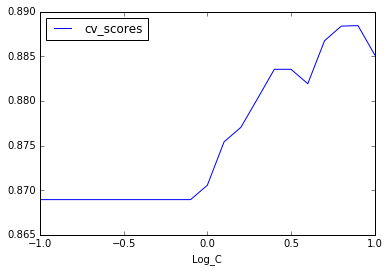

In [47]:
c_list = np.logspace(-1,1,21) 
c_index = np.linspace(-1,1,21)
cv_scores = []

for c_score in c_list:
    lm = LogisticRegression(C = c_score)
    cv_scores.append(cross_val_score(lm,X1_strd,y,cv=10).mean())

C_Choice_df = pd.DataFrame({'cv_scores': cv_scores ,'Log_C': c_index })
C_Choice_df.plot(x ='Log_C',y = 'cv_scores' );

In [48]:
# Try testing and plot using different C as input and l1 penalty
lm = LogisticRegression(C = 10**(.9), penalty = "l1")
lm.fit(X1_strd,y)
y_hat = lm.predict(X1_strd)
coefs = zip(lm.coef_[0],X1_strd.columns.values)
coefs

[(-19.561985061491615, 'SPHEQ'),
 (-0.83862413458194141, 'AL'),
 (1.9276516129534222, 'ACD'),
 (-0.34589012809755099, 'LT'),
 (-0.470265954824093, 'VCD'),
 (-0.07820671607437045, 'AGE'),
 (0.59485356403391443, 'GENDER'),
 (-2.167656891223456, 'SPORTHR'),
 (1.3780971823331505, 'READHR'),
 (0.91195297185789481, 'COMPHR'),
 (-2.2358814976941508, 'STUDYHR'),
 (-0.28979754521038897, 'TVHR'),
 (0.0, 'DIOPTERHR'),
 (0.69221132703694388, 'MOMMY'),
 (0.79484604965754835, 'DADMY')]

In [49]:
# List your variables from the smallest to the largets
sorted(coefs,reverse=True)

[(1.9276516129534222, 'ACD'),
 (1.3780971823331505, 'READHR'),
 (0.91195297185789481, 'COMPHR'),
 (0.79484604965754835, 'DADMY'),
 (0.69221132703694388, 'MOMMY'),
 (0.59485356403391443, 'GENDER'),
 (0.0, 'DIOPTERHR'),
 (-0.07820671607437045, 'AGE'),
 (-0.28979754521038897, 'TVHR'),
 (-0.34589012809755099, 'LT'),
 (-0.470265954824093, 'VCD'),
 (-0.83862413458194141, 'AL'),
 (-2.167656891223456, 'SPORTHR'),
 (-2.2358814976941508, 'STUDYHR'),
 (-19.561985061491615, 'SPHEQ')]

#### What is your conclusions about your Grandmothers' and some other Drs' claims?

Answer: It looks like the physical quality of ACD has a major impact, but the number of hours reading and computer hours have the greatest impact. Kids who read a lot outside of school are 137% more likely to have myopia, and computers are 91% more likely. Gender and parental myopia have a substantial impact as well.

#### Draw ROC curve for your best tuned model. 

0.896728510012


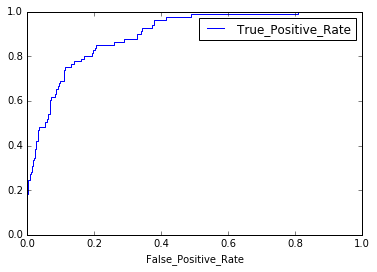

In [52]:
y_hat_probability = lm.predict_proba(X1_strd).T[1]  #T[1] returns probability of belonging to class
# print(y_hat_probability)
print(roc_auc_score(y, y_hat_probability))
vals = roc_curve(y, y_hat_probability)
Roc_DataFrame = pd.DataFrame({'False_Positive_Rate':vals[0],'True_Positive_Rate':vals[1]})
Roc_DataFrame.plot(x = 'False_Positive_Rate' , y = 'True_Positive_Rate' ) #agian beautiful Graph